# Projeto Final Bootcamp de Data Science aplicada Alura
![](https://play-lh.googleusercontent.com/IDLZXWHLCVun428g_YGnR2HgnoIUlIRNfkmEEM0hmrzhBKZrhJ5UwM0_eHaWQT4gXAs)

# 1- Introdução:

Uma das grandes preocupações durante a pandemia da COVID-19 foi sobrecarga nos sistemas de saúde, que afetou a disponibilidade de leitos de UTI nos hospitais. Para evitar o colapso era importante que os hospitais fossem capazes de prever qual seria a demanda por tais leitos, para poder se previnir com antecedência de possíveis lotações e agendar a transferência de pacientes para outros hospitais.

Pensando nisso a equipe de Data Intelligence do hospital Sírio-Libanês disponibilizou uma base de dados de pacientes com COVID-19 no Kaggle para o desenvolvimento de modelos de machine learning capazes de prever se um dado paciente iria precisar ou não de um leito de UTI.


### Importando as bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from funcoes import busca_hiperparametros
import warnings
warnings.filterwarnings("ignore")

### Importando os dados limpos

(a limpeza dos dados foi feita em outro notebook!)

In [2]:
dados_limpos = pd.read_csv("dados_limpos")

In [3]:
display(dados_limpos)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
2,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
348,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0-2,0
349,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
350,383,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0


# Na base de dados encontramos 4 tipos de variáveis

* Informação demográfica - 3 variáveis (gênero e idade)
* Doenças pré-existentes - 9 variáveis (6 grupos, pressão alta, imunossuprimido e outros)
* Resultados do exame de sangue - 36 variáveis
* Sinais vitais - 6 variáveis

# Iremos fornecer essas informações ao nosso modelo para obtermos previsões.

# 2- Modelos de Machine Learning

# Dividindo os dados em treino e teste

Para evitar o problema do overfit precisamos separar uma parte dos dados que ficarão fora do processo do treino do modelo.
Isso evita com que o modelo não apenas "decore" os dados e, consequentemente, não tenha nenhum poder preditivo com dados futuros!

Como nossa base de dados é pequena vamos utilizar grande parte dela para o treino. Escolhemos usar 85% dos dados para treino e reservar 15% para o teste.

In [7]:
np.random.seed(73246)

y = dados_limpos["ICU"]
x = dados_limpos.drop(["PATIENT_VISIT_IDENTIFIER","ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size= 0.85)

## O primeiro passo antes de começar a entrar na parte dos modelos de machine learnig é ter um baseline, isto é, um resultado que defina o mínimo de precisão que os modelos desenvolvidos precisam alcançar.

## O baseline escolhido foi o DummyClassifier. Esse modelo equivale a chutar o resultado que ocorre com mais frequência para todas as predições.


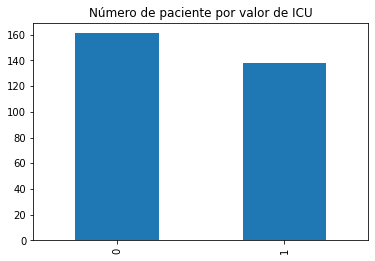

In [17]:
y_train.value_counts().plot(kind="bar")
plt.title("Número de paciente por valor de ICU")
plt.show()

## Nos nosso dados de treino o resultado mais frequente é que o paciente não foi pra UTI (ICU = 0)

## Portanto, a previsão do DummyClassifier para os dados de teste será que nenhum dos pacientes vai precisar de UTI!

In [9]:
modelo = DummyClassifier()
modelo.fit(x_train, y_train)

y_prediction = modelo.predict(x_test)
accuracy_score(y_test, y_prediction)

0.5283018867924528

## Com essa lógica nosso modelo ingênuo consegue o resultado de 52,78% de acurácia!

## Em modelo de classificação, se a base não for tão balanceada como a nossa, o DummyClassifier pode conseguir níveis de acurácia bem maiores.

## Outro ponto a ser frisado é a escolha do indicador para avaliar a eficácia do modelo. 

## O DummyClassifier nos mostra como a acurácia pode ser enganosa. Para nosso modelo, o perigo de se basear nela é ainda maior porque estamos trabalhando com vidas!!

## Mandar erroneamente para casa um paciente que na realidade irá precisar de UTI é temerário. A acurácia não faz distinção para esse tipo de erro, então utilizaremos outra métrica para avaliar nossos modelos.

## A métrica é a área sob a curva da curva ROC (AUC), que vai de 0 a 1, sendo igual a 1 quando o modelo é perfeito!

# 2.1- Regressão Logística

## O primeiro modelo propriamente de machine learning que iremos utilizar é o LogisticRegression

In [10]:
modelo = LogisticRegression()

## Para otimizar nosso modelo iremos realizar o grid search, que consiste de uma busca exaustiva de diferentes combinações de hiperparâmetros, até encontrar a melhor delas.

In [11]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10000, 20000]
    }
]



## Utilizando a função busca_hiperparametros fazemos o grid search. Como existem inúmeras combinações possíveis ele é computacionalmente intenso e leva um certo tempo.

In [14]:
busca_hiperparametros(modelo, x, y, 5, 5, param_grid)

AUC medio treino:  0.8337400462186447
AUC medio teste:  0.7683222875986034
Intervalo confiança 95% do AUC medio teste:  0.6682953234252605 - 0.8683492517719463


(0.7683222875986034, 0.8337400462186447)

## E encontramos a melhor escolha de hiperparâmetros!!

In [ ]:
busca.best_params_

## Os resultado dão um AUC médio de 0,768 nos dados de teste. No treino o modelo é um pouco melhor apenas, o que é esperado.

# 2.2- RandomForestClassifier

## Agora nosso segundo modelo de ML. 

## Vamos repetir todas as mesmas etapas para descobrir se o modelo de árvore de decisão é melhor que o modelo anterior.

In [15]:
modelo_arvore = RandomForestClassifier()
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

In [16]:
busca_hiperparametros(modelo_arvore, x, y, 5, 5, espaco_de_parametros)

AUC medio treino:  0.8578380040798976
AUC medio teste:  0.7933531078925816
Intervalo confiança 95% do AUC medio teste:  0.7173248328141568 - 0.8693813829710064


(0.7933531078925816, 0.8578380040798976)

## Temos uma melhora marginal em relação ao modelo anterior, com AUC de 0,793!

## Em relação à Regressão Logistica, o modelo de Random Forest não só tem um AUC médio maior, como também uma variância menor e, consequentemente, um intervalo de confiança mais estreito.

## Portanto não restam dúvidas que o Random Forest teve uma melhor performance para o nosso caso!

# 3- Conclusão

## Nesse projeto exploramos o uso de técnicas de machine learning para serem implemetadas na área da saúde, mais especificamente, para prever a necessidade de UTI para paciente que confirmadamente contraíram a COVID-19.

## Foram utilizados dois modelos diferentes da biblioteca scikit-learn: Logistic Regression e Random Forest

## Os resultados apontaram que, para nosso problema específico e conjunto de dados, o modelo Random Forest (AUC médio = 0,793) teve um desempenho ligeiramente superior ao modelo Logistic Regression (AUC médio = 0,768).

# Limitações

## Nosso projeto possui algumas limitações:

* o tamanho do conjunto de dados é relativamente pequeno (após a limpeza restaram 352 pacientes)
* testamos apenas dois modelos diferentes quando existem muitos outros que poderiam ter um fit melhor
* por limitações computacionais e de tempo o grid search não foi tão amplo como poderia ser

# Considerações finais

## Como Milton Friedman bem disse, não existe almoço grátis. Sempre existirá um modelo e uma escolha de hiperparâmetros que produzirá melhores resultados, então o cientista de dados deve sempre estar explorando suas possibilidades.

![](https://i.pinimg.com/originals/2d/c0/a9/2dc0a95b72022c2bd43aaadf061ff71e.jpg)